<a href="https://colab.research.google.com/github/klmahalakshmi0102/Data_Analysis/blob/master/Bank_Statements.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.  Transaction Analysis:
   - What is the total number of transactions made over the year?
   - What is the distribution of transaction amounts (e.g., small vs. large transactions)?(define small and large transactions by yourself)
   - Analyze the frequency of different transaction types (debit vs. credit).



In [ ]:
from google.colab import files
import pandas as pd
import json
from pandas import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt
import csv


In [ ]:

f = open('/content/P1- BankStatements.json')

data = json.load(f)

# Extract the transactions
transactions = data["Account"]["Transactions"]["Transaction"]

# Define CSV file name
csv_file_name = "transactions.csv"

# Specify the column names
columns = transactions[0].keys()

# Write to CSV
with open(csv_file_name, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=columns)
    writer.writeheader()
    for transaction in transactions:
        writer.writerow(transaction)

print(f"CSV file '{csv_file_name}' has been created.")


CSV file 'transactions.csv' has been created.


In [ ]:
import pandas as pd

transactions_df = pd.read_csv("/content/transactions.csv")

transactions_df.head()

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference
0,DEBIT,CARD,100.0,2180.8,2023-06-27T09:40:19+05:30,2023-06-27,S39488701,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NaN
1,DEBIT,CARD,170.0,2010.8,2023-06-28T09:51:57+05:30,2023-06-28,S76862822,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NaN
2,DEBIT,CARD,500.0,1510.8,2023-07-26T10:04:00+05:30,2023-07-26,S31451661,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NaN
3,CREDIT,OTHERS,15.0,1525.8,2023-08-06T11:10:38+05:30,2023-07-31,S66463256,51888100006461IntPd01-05-2023 to 31-07-2023,NaN
4,DEBIT,ATM,1000.0,525.8,2023-08-07T17:13:13+05:30,2023-08-07,S18475743,ATM/CASH/321917012791/XXXXXXXXXXXX8896,NaN


In [ ]:
total_transactions = len(transactions_df)
print(f"Total number of transactions: {total_transactions}")

Total number of transactions: 985


In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Convert 'amount' column to numeric values
transactions_df['amount'] = pd.to_numeric(transactions_df['amount'])

# Reshape data for clustering (KMeans expects a 2D array)
X = transactions_df['amount'].values.reshape(-1, 1)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
transactions_df['cluster'] = kmeans.labels_

# Identify clusters
cluster_centers = kmeans.cluster_centers_.flatten()
small_cluster_label = np.argmin(cluster_centers)
large_cluster_label = np.argmax(cluster_centers)

# Count transactions in each cluster
total_small = sum(transactions_df['cluster'] == small_cluster_label)
total_large = sum(transactions_df['cluster'] == large_cluster_label)

print(f"Distribution of transaction amounts:")
print(f"- Small transactions: {total_small}")
print(f"- Large transactions: {total_large}")

Distribution of transaction amounts:
- Small transactions: 971
- Large transactions: 14


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# Convert 'amount' column to numeric values
transactions_df['amount'] = pd.to_numeric(transactions_df['amount'])

# Define small and large transactions
# 160
small_threshold = 200


# Count small and large transactions
small_transactions = transactions_df[transactions_df['amount'] <= small_threshold]
large_transactions = transactions_df[transactions_df['amount'] > small_threshold]

# Calculate distribution
total_small = len(small_transactions)
total_large = len(large_transactions)


print(f"Distribution of transaction amounts:")
print(f"- Small transactions (<={small_threshold} INR): {total_small}")
print(f"- Large transactions (> {small_threshold} INR): {total_large}")


Distribution of transaction amounts:
- Small transactions (<=200 INR): 547
- Large transactions (> 200 INR): 438


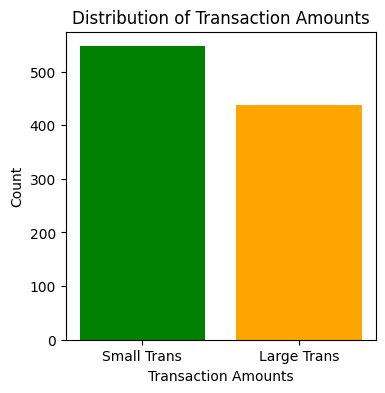

In [ ]:
# Visualize distribution of transaction amounts
labels = ['Small Trans', 'Large Trans']
sizes = [total_small, total_large]

plt.figure(figsize=(4, 4))
plt.bar(labels, sizes, color=['green', 'orange'])
plt.xlabel('Transaction Amounts')
plt.ylabel('Count')
plt.title('Distribution of Transaction Amounts')
plt.show()



In [ ]:
transaction_types = transactions_df['type'].value_counts()
labels = transaction_types.index
sizes = transaction_types.values

Frequency of transaction types:
type
DEBIT     695
CREDIT    290
Name: count, dtype: int64


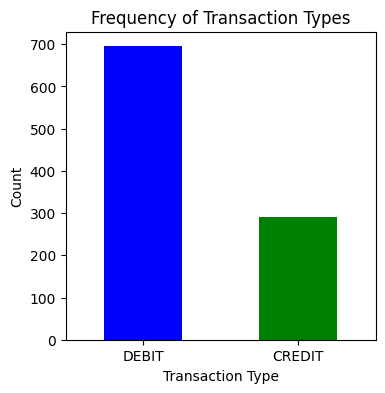

In [ ]:
# Display frequency
print("Frequency of transaction types:")
print(transaction_types)

# Visualize frequency of transaction types (bar chart)
plt.figure(figsize=(4, 4))
transaction_types.plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Frequency of Transaction Types')
plt.xticks(rotation=0)
plt.show()

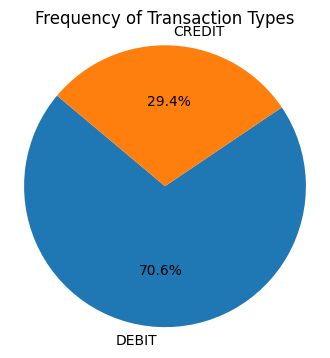

In [ ]:
# Count frequency of transaction types
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Frequency of Transaction Types')
plt.show()


# 2.  Balance Analysis:
   - What is the trend of the account balance over time?
   - Identify any periods with significant changes in the account balance.


In [ ]:

# Extract month and year from value date
transactions_df['month_year'] = pd.to_datetime(transactions_df['valueDate']).dt.strftime('%Y-%m')

# Group by month_year and calculate the ending balance
monthly_balances = transactions_df.groupby('month_year')['currentBalance'].sum()
monthly_balances



month_year
2023-06       4191.60
2023-07       3036.60
2023-08      88062.60
2023-09     261117.20
2023-10     239839.60
2023-11    2057059.60
2023-12     576258.55
2024-01     217363.69
2024-02     399473.24
2024-03    1308030.68
2024-04     337375.12
2024-05     320980.61
Name: currentBalance, dtype: float64

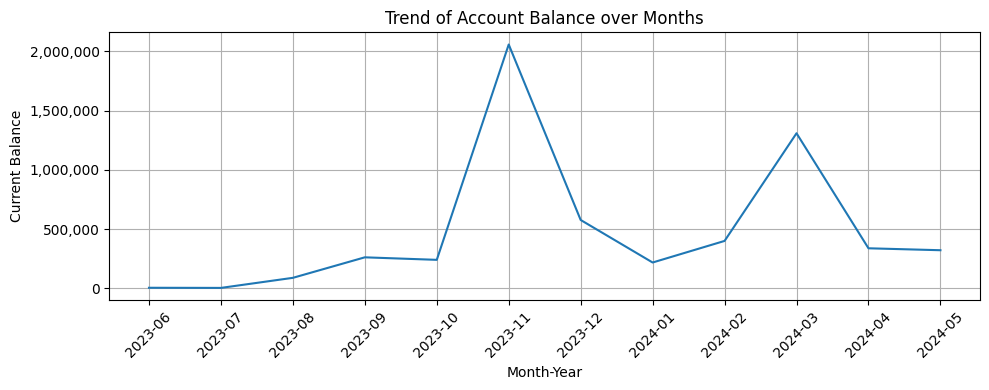

In [ ]:
import matplotlib.ticker as ticker
plt.figure(figsize=(10, 4))
plt.plot(monthly_balances)
plt.xlabel('Month-Year')
plt.ylabel('Current Balance')
plt.title('Trend of Account Balance over Months')
plt.xticks(rotation=45)

formatter = ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

plt.grid(True)
plt.tight_layout()
plt.show()


# 3. Spending Patterns:
   - What are the main categories of expenses (e.g., fuel, Ecommerce, food, shopping, ATM withdrawals, UPI transactions)?
   - Analyze the frequency and amount of spending in each category.

# 4.  Income Analysis:
   - What are the main sources of income (e.g., salary, UPI credits)?
   - Identify any patterns in the timing and amount of income received.


In [ ]:
categories = {
    'Fuel': ['PRCR'],
    'ATM Withdrawals': ['ATM', 'CASH'],
    'UPI Transactions': ['UPI'],
    'EMT': ['NEFT', 'IMPS'], #electronic money transfer system
    'UPI Credits': ['UPI'],
    'Interest': ['INTEREST', 'INT'],
    'Other': []  # This will be used for transactions that don't fit any category
}

# Function to categorize transaction based on narration
def categorize_transaction(narration, type_):
    if type_ == 'CREDIT':
        income_categories = ['EMT','UPI Credits', 'Interest', 'Other']
        for category in income_categories:
            if any(keyword in narration.upper() for keyword in categories[category]):
                return category
    else:
        for category, keywords in categories.items():
            if any(keyword in narration.upper() for keyword in keywords):
                return category
    return 'Other'

# Apply the categorization function to the DataFrame
transactions_df['category'] = transactions_df.apply(lambda x: categorize_transaction(x['narration'], x['type']), axis=1)

# Summarize expenses
expenses_summary = transactions_df[transactions_df['type'] == 'DEBIT'].groupby('category').agg(transaction_count=('amount', 'size'),total_amount=('amount', 'sum')).reset_index()



# Display the summaries
print("Expenses Summary")
expenses_summary






Expenses Summary


,category,transaction_count,total_amount
0,ATM Withdrawals,3,13500.0
1,Fuel,4,830.0
2,UPI Transactions,688,407759.9


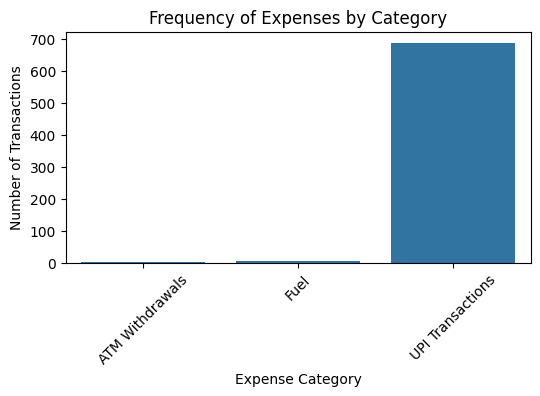

In [ ]:

# Plot the frequency of expenses by category
plt.figure(figsize=(6,3))
sns.barplot(x='category', y='transaction_count', data=expenses_summary)
plt.title('Frequency of Expenses by Category')
plt.xlabel('Expense Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()


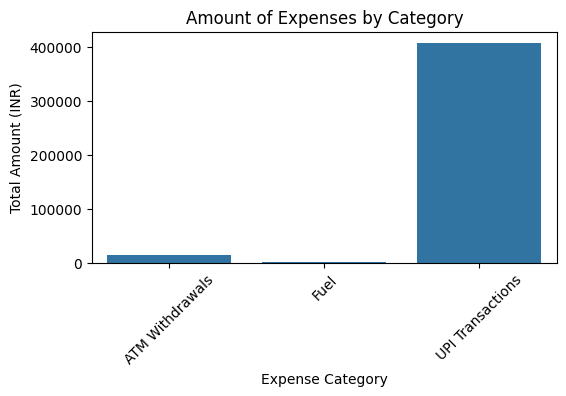

In [ ]:

# Plot the amount of expenses by category
plt.figure(figsize=(6,3))
sns.barplot(x='category', y='total_amount', data=expenses_summary)
plt.title('Amount of Expenses by Category')
plt.xlabel('Expense Category')
plt.ylabel('Total Amount (INR)')
plt.xticks(rotation=45)
plt.show()



Income Summary
      category  transaction_count  total_amount
0          EMT                184     196102.51
1     Interest                  4        135.00
2        Other                  1      45000.00
3  UPI Credits                101     179333.00


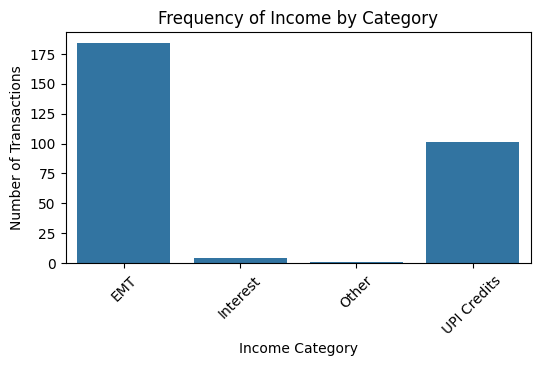

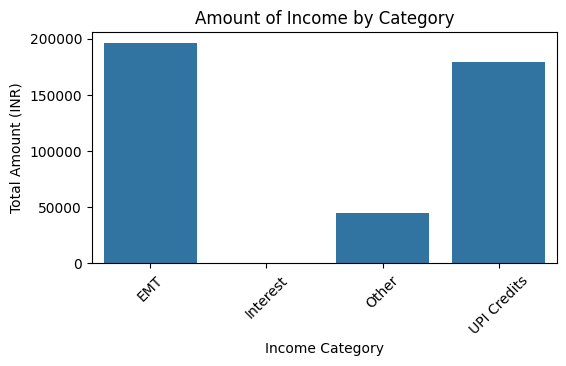

In [ ]:
# Summarize income
income_summary = transactions_df[transactions_df['type'] == 'CREDIT'].groupby('category').agg(
    transaction_count=('amount', 'size'),
    total_amount=('amount', 'sum')
).reset_index()


print("\nIncome Summary")
print(income_summary)

# Plot the frequency of income by category
plt.figure(figsize=(6,3))
sns.barplot(x='category', y='transaction_count', data=income_summary)
plt.title('Frequency of Income by Category')
plt.xlabel('Income Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()


print('\n')
# Plot the amount of income by category
plt.figure(figsize=(6,3))
sns.barplot(x='category', y='total_amount', data=income_summary)
plt.title('Amount of Income by Category')
plt.xlabel('Income Category')
plt.ylabel('Total Amount (INR)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# transactions_df.drop('income_category',axis =1).head()

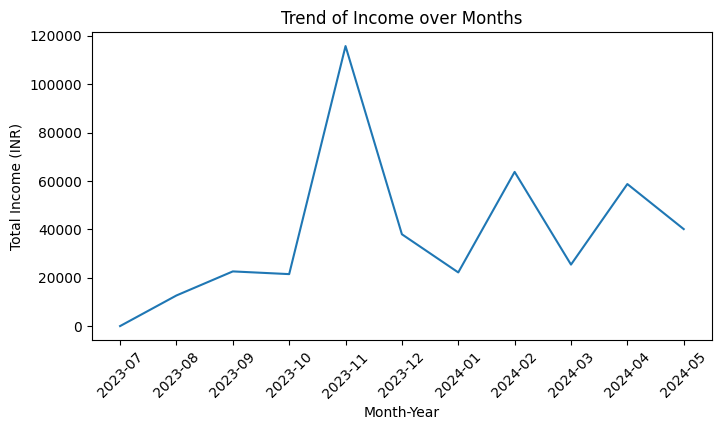

In [ ]:
transactions_df['month_year'] = pd.to_datetime(transactions_df['valueDate']).dt.strftime('%Y-%m')

# Group income transactions by month_year and calculate the total amount
monthly_income = transactions_df[transactions_df['type'] == 'CREDIT'].groupby('month_year')['amount'].sum()

# Plot the trend of income over months
plt.figure(figsize=(8, 4))
sns.lineplot(data=monthly_income)
plt.xlabel('Month-Year')
plt.ylabel('Total Income (INR)')
plt.title('Trend of Income over Months')
plt.xticks(rotation=45)
plt.show()


In [ ]:
monthly_income_avg = transactions_df[transactions_df['type'] == 'CREDIT'].groupby('month_year')['amount'].mean()

# Calculate the standard deviation of income for each month
monthly_income_std = transactions_df[transactions_df['type'] == 'CREDIT'].groupby('month_year')['amount'].std()




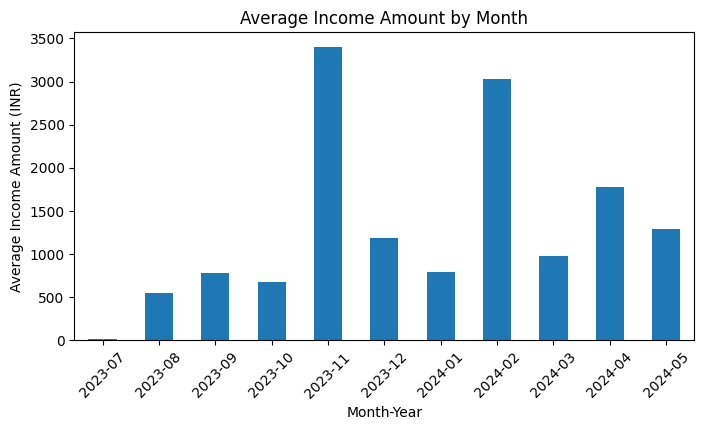

In [ ]:

# Calculate the average income amount for each month
monthly_income_avg = transactions_df[transactions_df['type'] == 'CREDIT'].groupby(transactions_df['month_year'])['amount'].mean()

# Plot the average income amount by month
plt.figure(figsize=(8, 4))
monthly_income_avg.plot(kind='bar')
plt.xlabel('Month-Year')
plt.ylabel('Average Income Amount (INR)')
plt.title('Average Income Amount by Month')
plt.xticks(rotation=45)
plt.show()



In [ ]:
transactions_df.dtypes

type                     object
mode                     object
amount                  float64
currentBalance          float64
transactionTimestamp     object
valueDate                object
txnId                    object
narration                object
reference               float64
month_year               object
category                 object
dtype: object

# 5.  Alert Generation:
   - Identify any unusual or suspicious transactions.
   - Generate alerts for low balance or high expenditure periods.



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor

# Select relevant features for anomaly detection
features = ['amount', 'currentBalance']

# Separate features and target variable
X = transactions_df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the Local Outlier Factor model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# Fit the model to the data
lof.fit(X_scaled)

# Get the anomaly scores
lof_scores = lof.negative_outlier_factor_

# Set a threshold for anomaly detection
threshold = -1.5

# Identify anomalous transactions
anomalous_transactions = transactions_df[lof_scores < threshold]

# Print the anomalous transactions
print("Anomalous Transactions:")
anomalous_transactions.head()
# len(anomalous_transactions)
# anomalous_transactions[:10]



Anomalous Transactions:


,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference,month_year,category
265,CREDIT,OTHERS,4730.0,10560.8,2023-11-12T06:36:51+05:30,2023-11-12,S57095035,NEFT-AXNPN33168292220-PHONEPE PRIVATE LIMITED-...,9.220200e+14,2023-11,EMT
267,DEBIT,UPI,50.0,8850.8,2023-11-12T17:41:52+05:30,2023-11-12,S87776442,UPI/331654358281/174151/UPI/saxenaatul73okaxis,NaN,2023-11,UPI Transactions
275,CREDIT,UPI,37999.0,43892.8,2023-11-14T18:31:11+05:30,2023-11-14,S65593249,UPI/331812106847/183112/UPI/311999sshuklaaxl/P,NaN,2023-11,UPI Credits
276,DEBIT,UPI,1.0,43891.8,2023-11-14T18:47:58+05:30,2023-11-14,S66419723,UPI/331818919138/184758/UPI/7007674186paytm/UP,NaN,2023-11,UPI Transactions
277,DEBIT,UPI,16500.0,27391.8,2023-11-14T18:49:41+05:30,2023-11-14,S66498670,UPI/331814821452/184941/UPI/7007674186paytm/UP,NaN,2023-11,UPI Transactions


In [ ]:
suspicious_transactions = transactions_df[(transactions_df['amount'] > 100) & (transactions_df['category'] == 'Other')]

if len(suspicious_transactions) > 0:
    print("Suspicious transactions found:")
    print(suspicious_transactions[['type','amount', 'narration', 'category']])
else:
    print("No suspicious transactions found.")


Suspicious transactions found:
       type   amount narration category
291  CREDIT  45000.0   BY CASH    Other


In [ ]:

# unusual_transactions = transactions_df[((transactions_df['amount'] > 10000) & (transactions_df['category'] == 'Other')) | (transactions_df['category'] == 'ATM Withdrawals')]

# # Print unusual transactions
# print("Unusual Transactions:")
# unusual_transactions


In [ ]:
# Set threshold for low balance alert
low_balance_threshold = 1000
transactions_df['currentBalance'] = pd.to_numeric(transactions_df['currentBalance'], errors='coerce')

# Identify low balance periods
low_balance_periods = transactions_df[transactions_df['currentBalance'] < low_balance_threshold]

# Create a list to store alerts
low_balance_alerts = []

# Iterate over the low balance periods and generate alerts
for index, row in low_balance_periods.iterrows():
    alert = {
        'date': row['transactionTimestamp'],
        'currentBalance': row['currentBalance'],
        'category': row['category'],
        'message': f"Low balance alert: Balance dropped to {row['currentBalance']} on {row['transactionTimestamp']}"
    }
    low_balance_alerts.append(alert)

# Convert the list of alerts to a DataFrame for better readability
low_balance_alerts_df = pd.DataFrame(low_balance_alerts)

# Print low balance alerts
pd.set_option('display.max_colwidth', None)

low_balance_alerts_df.head()

,date,currentBalance,category,message
0,2023-08-07T17:13:13+05:30,525.8,ATM Withdrawals,Low balance alert: Balance dropped to 525.8 on 2023-08-07T17:13:13+05:30
1,2023-08-22T08:05:06+05:30,524.8,UPI Transactions,Low balance alert: Balance dropped to 524.8 on 2023-08-22T08:05:06+05:30
2,2023-08-25T10:39:35+05:30,794.8,UPI Transactions,Low balance alert: Balance dropped to 794.8 on 2023-08-25T10:39:35+05:30
3,2023-08-25T12:03:11+05:30,674.8,UPI Transactions,Low balance alert: Balance dropped to 674.8 on 2023-08-25T12:03:11+05:30
4,2023-08-25T16:56:59+05:30,175.8,UPI Transactions,Low balance alert: Balance dropped to 175.8 on 2023-08-25T16:56:59+05:30


In [ ]:
max(transactions_df[transactions_df['type'] == 'DEBIT']['amount'])

30000.0

In [ ]:
max(transactions_df[transactions_df['type'] == 'CREDIT']['amount'])

45000.0

In [ ]:
# Filter transactions to only include debit transactions
debit_transactions = transactions_df[transactions_df['type'] == 'DEBIT']



# Set threshold for high expenditure
high_expenditure_threshold = 10000

# Calculate daily expenditure
daily_expenditure = debit_transactions.groupby('transactionTimestamp')['amount'].sum().reset_index()

# Identify high expenditure periods
high_expenditure_periods = daily_expenditure[daily_expenditure['amount'] > high_expenditure_threshold]

# Print high expenditure periods
print("\nHigh Expenditure Periods (Debit Transactions Only):")
high_expenditure_periods



High Expenditure Periods (Debit Transactions Only):


,transactionTimestamp,amount
178,2023-11-14T18:49:41+05:30,16500.0
191,2023-11-17T16:34:54+05:30,21000.0
214,2023-11-29T16:15:33+05:30,19000.0
215,2023-11-29T17:09:47+05:30,12700.0
229,2023-12-05T15:50:06+05:30,13000.0
376,2024-02-25T11:08:34+05:30,20000.0
433,2024-03-20T18:56:48+05:30,12000.0
506,2024-04-12T20:50:06+05:30,30000.0


In [ ]:

high_expenditure_alerts = []

# Iterate over the high expenditure periods and generate alerts
for index, row in high_expenditure_periods.iterrows():
    alert = {
        'date': row['transactionTimestamp'],
        'total_expenditure': row['amount'],
        'message': f"High expenditure alert: Total expenditure was {row['amount']} on {row['transactionTimestamp']}"
    }
    high_expenditure_alerts.append(alert)

# Convert the list of alerts to a DataFrame for better readability
high_expenditure_alerts_df = pd.DataFrame(high_expenditure_alerts)
pd.set_option('display.max_colwidth', None)
# Print high expenditure alerts
print("\nHigh Expenditure Alerts:")
high_expenditure_alerts_df



High Expenditure Alerts:


,date,total_expenditure,message
0,2023-11-14T18:49:41+05:30,16500.0,High expenditure alert: Total expenditure was 16500.0 on 2023-11-14T18:49:41+05:30
1,2023-11-17T16:34:54+05:30,21000.0,High expenditure alert: Total expenditure was 21000.0 on 2023-11-17T16:34:54+05:30
2,2023-11-29T16:15:33+05:30,19000.0,High expenditure alert: Total expenditure was 19000.0 on 2023-11-29T16:15:33+05:30
3,2023-11-29T17:09:47+05:30,12700.0,High expenditure alert: Total expenditure was 12700.0 on 2023-11-29T17:09:47+05:30
4,2023-12-05T15:50:06+05:30,13000.0,High expenditure alert: Total expenditure was 13000.0 on 2023-12-05T15:50:06+05:30
5,2024-02-25T11:08:34+05:30,20000.0,High expenditure alert: Total expenditure was 20000.0 on 2024-02-25T11:08:34+05:30
6,2024-03-20T18:56:48+05:30,12000.0,High expenditure alert: Total expenditure was 12000.0 on 2024-03-20T18:56:48+05:30
7,2024-04-12T20:50:06+05:30,30000.0,High expenditure alert: Total expenditure was 30000.0 on 2024-04-12T20:50:06+05:30
